Objetivo:

Realizar redes neuronales en 2D: Para SII.    
Para los datos preetiquetados: 12.45% Pre-etiquetadas - 158 galaxias, se van a dividir así:  
54% = Datos de entrenamiento = 85 Datos.  
46% = Datos para tomar la exactitud = 73 Datos.

* 0. Traer Datos Pre-etiqDeBase: Con 1269 Observaciones en Visual e infrarrojo. 
* 1. Hacer redes= 'Ejex_NH', 'Ejey_OHB'.
* 2. Medición de exactitud con el 46% restante de los datos. 
* 3. Realizar gráfica.

## 0. Datos:

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import date
import warnings
warnings.filterwarnings 
import astropy.units as u
from astropy.table import Table
#from astroquery.sdss import SDSS
from array import array
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
FusionData = pd.read_csv('C:/Users/Wind1/Downloads/AaaCristinaCodigos/Mydata.csv')    

In [3]:
FusionData[0:5]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,fnu_100,rat_12_25,rat_25_60,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,15.08,0.700000,0.096899,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,1.01,1.555556,0.329268,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,1.79,0.500000,0.666667,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.6539,263.62670,358.444700,54.00912,...,2.83,0.591837,0.401639,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.6220,74.79313,28.152840,74.78139,...,2.10,0.813953,0.632353,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja


In [4]:
conteoEtiqRef = FusionData['EtiqRef'].value_counts()
conteoEtiqRef

Infrarroja    75
Seyfert       60
LINER         23
Name: EtiqRef, dtype: int64

In [5]:
grupo1 = FusionData.sample(frac=0.6, random_state=1)
grupo2 = FusionData.drop(grupo1.index)

In [6]:
FusionData['EtiqRef60%'] = grupo1['EtiqRef']
FusionData['EtiqRef40%'] = grupo2['EtiqRef']

In [7]:
FusionData[0:5]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,rat_25_60,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef,EtiqRef60%,EtiqRef40%
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,0.096899,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN,NaN,NaN
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,0.329268,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN,NaN,NaN
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,0.666667,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN,NaN,NaN
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.6539,263.62670,358.444700,54.00912,...,0.401639,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN,NaN,NaN
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.6220,74.79313,28.152840,74.78139,...,0.632353,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja,NaN,Infrarroja


### División por grupos EtiqRef 60% y 40%

In [8]:
conteoEtiqRef60 = FusionData['EtiqRef60%'].value_counts()
conteoEtiqRef60

Infrarroja    43
Seyfert       27
LINER         15
Name: EtiqRef60%, dtype: int64

In [9]:
conteoEtiqRef40 = FusionData['EtiqRef40%'].value_counts()
conteoEtiqRef40

Seyfert       33
Infrarroja    32
LINER          8
Name: EtiqRef40%, dtype: int64

## 1. Hacer Redes neuronales para X = 'Ejex_NH', 'Ejey_OHb'.

In [10]:
# Elimina las filas con NaN en la columna 'EtiqRef60%' para el entrenamiento
FusionData_train = FusionData.dropna(subset=['EtiqRef60%'])

In [11]:
# Divide tus datos de entrenamiento en conjuntos de entrenamiento y prueba
X_train = FusionData_train[['Ejex_SH', 'Ejey_OHb']]
y_train = FusionData_train['EtiqRef60%']

In [12]:
# Codifica las etiquetas de clase
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [13]:
# Escala tus datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
# Construye y entrena tu modelo de red neuronal
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 clases: Infrarroja, Seyfert, LINER

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32)



Epoch 1/50


3/3 [==============================] - 1s 3ms/step - loss: 1.1200 - accuracy: 0.2471
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 1.0215 - accuracy: 0.8824
Epoch 3/50
3/3 [==============================] - 0s 2ms/step - loss: 0.9359 - accuracy: 0.9294
Epoch 4/50
3/3 [==============================] - 0s 2ms/step - loss: 0.8614 - accuracy: 0.9647
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 0.7917 - accuracy: 0.9647
Epoch 6/50
3/3 [==============================] - 0s 2ms/step - loss: 0.7239 - accuracy: 0.9529
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.9529
Epoch 8/50
3/3 [==============================] - 0s 1ms/step - loss: 0.5982 - accuracy: 0.9529
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.9529
Epoch 10/50
3/3 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.9529
Epoch 11/50
3/3 [==================

In [15]:
# Construye y entrena tu modelo de red neuronal
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 clases: Infrarroja, Seyfert, LINER

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32)

Epoch 1/50
3/3 [==============================] - 0s 2ms/step - loss: 1.1835 - accuracy: 0.2118
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 1.0537 - accuracy: 0.6235
Epoch 3/50
3/3 [==============================] - 0s 1ms/step - loss: 0.9393 - accuracy: 0.8235
Epoch 4/50
3/3 [==============================] - 0s 2ms/step - loss: 0.8428 - accuracy: 0.9176
Epoch 5/50
3/3 [==============================] - 0s 1ms/step - loss: 0.7591 - accuracy: 0.9412
Epoch 6/50
3/3 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.9647
Epoch 7/50
3/3 [==============================] - 0s 1ms/step - loss: 0.6168 - accuracy: 0.9765
Epoch 8/50
3/3 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.9647
Epoch 9/50
3/3 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.9647
Epoch 10/50
3/3 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.9647
Epoch 11/50
3/3 [======================

In [16]:
# Preprocesamiento de datos para todos los datos (incluyendo NaN)
X_all = FusionData[['Ejex_SH', 'Ejey_OHb']]
X_all_scaled = scaler.transform(X_all)

# Predecir etiquetas para todos los datos (incluyendo NaN)
all_predictions = model.predict(X_all_scaled)
all_predictions_classes = all_predictions.argmax(axis=-1)

40/40 [==============================] - 0s 624us/step


In [17]:
# Preprocesamiento de datos para todos los datos (incluyendo NaN)
X_all = FusionData[['Ejex_SH', 'Ejey_OHb']]
X_all_scaled = scaler.transform(X_all)

# Predecir etiquetas para todos los datos (incluyendo NaN)
all_predictions = model.predict(X_all_scaled)
all_predictions_classes = all_predictions.argmax(axis=-1)

40/40 [==============================] - 0s 599us/step


In [18]:
# Decodificar las etiquetas predichas
decoded_predictions = label_encoder.inverse_transform(all_predictions_classes)

In [19]:
# Añadir las predicciones al DataFrame original
FusionData['Predicciones'] = decoded_predictions
FusionData[0:5]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef,EtiqRef60%,EtiqRef40%,Predicciones
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN,NaN,NaN,Infrarroja
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN,NaN,NaN,Infrarroja
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN,NaN,NaN,Infrarroja
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.6539,263.62670,358.444700,54.00912,...,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN,NaN,NaN,Infrarroja
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.6220,74.79313,28.152840,74.78139,...,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja,NaN,Infrarroja,Infrarroja


In [20]:
conteoP = FusionData['Predicciones'].value_counts()
conteoP

Infrarroja    1109
Seyfert         97
LINER           63
Name: Predicciones, dtype: int64

## 2. Medición de exactitud con Frecuencia cruzada

In [21]:
tabla_frecuencias = pd.crosstab(FusionData['EtiqRef40%'], FusionData['Predicciones'], margins=True, margins_name="Total")
tabla_frecuencias

Predicciones,Infrarroja,LINER,Seyfert,Total
EtiqRef40%,,,,
Infrarroja,32,0,0,32
LINER,0,8,0,8
Seyfert,0,1,32,33
Total,32,9,32,73


In [22]:
# Para obtener las cantidades de coincidencias específicas, puedes acceder a los valores en la tabla
coincidencias_infrarroja = tabla_frecuencias.loc['Infrarroja', 'Infrarroja']
coincidencias_seyfert = tabla_frecuencias.loc['Seyfert', 'Seyfert']
coincidencias_liner = tabla_frecuencias.loc['LINER', 'LINER']

print("Coincidencias Infrarroja:", coincidencias_infrarroja)
print("Coincidencias Seyfert:", coincidencias_seyfert)
print("Coincidencias LINER:", coincidencias_liner)

Coincidencias Infrarroja: 32
Coincidencias Seyfert: 32
Coincidencias LINER: 8


### Cálculos

In [23]:
# Calcula los verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos
verdaderos_positivos = tabla_frecuencias.loc['Infrarroja', 'Infrarroja']
falsos_positivos = tabla_frecuencias.loc['Total', 'Infrarroja'] - verdaderos_positivos
falsos_negativos = tabla_frecuencias.loc['Infrarroja', 'Total'] - verdaderos_positivos
verdaderos_negativos = tabla_frecuencias.loc['Total', 'Total'] - verdaderos_positivos - falsos_positivos - falsos_negativos

In [24]:
# Calcula la Precisión
precision = verdaderos_positivos / (verdaderos_positivos + falsos_positivos)
# Calcula la Sensibilidad
sensibilidad = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)

In [25]:
# Calcula los Falsos Positivos y Falsos Negativos
falsos_positivos = falsos_positivos / (falsos_positivos + verdaderos_negativos)
falsos_negativos = falsos_negativos / (falsos_negativos + verdaderos_positivos)

In [26]:
# Imprime los resultados
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Falsos Positivos:", falsos_positivos)
print("Falsos Negativos:", falsos_negativos)

Precisión: 1.0
Sensibilidad: 1.0
Falsos Positivos: 0.0
Falsos Negativos: 0.0


## 3. Realizar gráfica

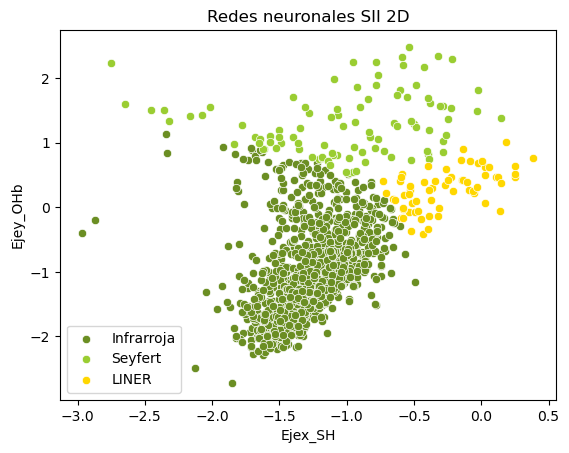

In [27]:
infrarroja_df = FusionData[FusionData['Predicciones'] == 'Infrarroja']
seyfert_df = FusionData[FusionData['Predicciones'] == 'Seyfert']
liner_df = FusionData[FusionData['Predicciones'] == 'LINER']

sns.scatterplot(data=infrarroja_df, x='Ejex_SH', y='Ejey_OHb', color='olivedrab', label='Infrarroja', marker='o')
sns.scatterplot(data=seyfert_df, x='Ejex_SH', y='Ejey_OHb', color='yellowgreen', label='Seyfert', marker='o')
sns.scatterplot(data=liner_df, x='Ejex_SH', y='Ejey_OHb', color='gold', label='LINER', marker='o')

plt.xlabel('Ejex_SH')
plt.ylabel('Ejey_OHb')
plt.title('Redes neuronales SII 2D')
plt.legend()
plt.show()

# Conclusiones:    

## 2. Medición: 100%